# Importing Modules

In [2]:
import numpy as np
import pandas as pd
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

import os
import random
import matplotlib.image as mpimg
import cv2
import shutil

import tensorflow as tf
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.models import Model
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing import image
from tqdm import tqdm
from tensorflow.keras.regularizers import l2
from sklearn.metrics import classification_report , confusion_matrix

from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout
from tensorflow.keras.applications import MobileNetV2

warnings.filterwarnings('ignore')

# Loading Dataset and EDA

In [3]:
path=r"D:\Jupyter Notebook\Projects\EYE Desease\dataset\labels.csv"
df=pd.read_csv(path)
df.head()

name  category  type  grade
0  1.jpg         0     4      3
1  2.jpg         0     4      3
2  3.jpg         0     2      2
3  4.jpg         0     2      1
4  5.jpg         0     1      3

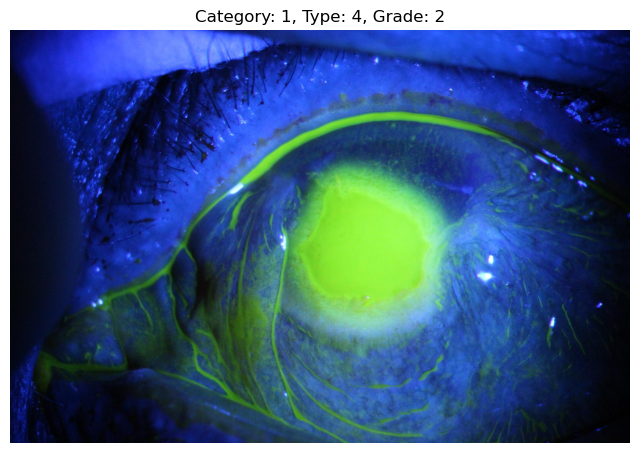

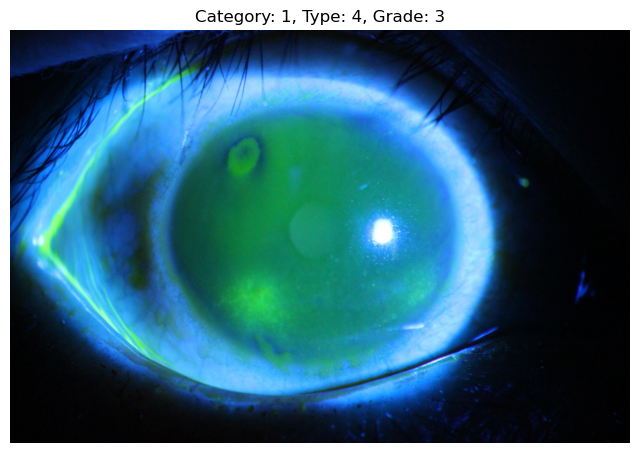

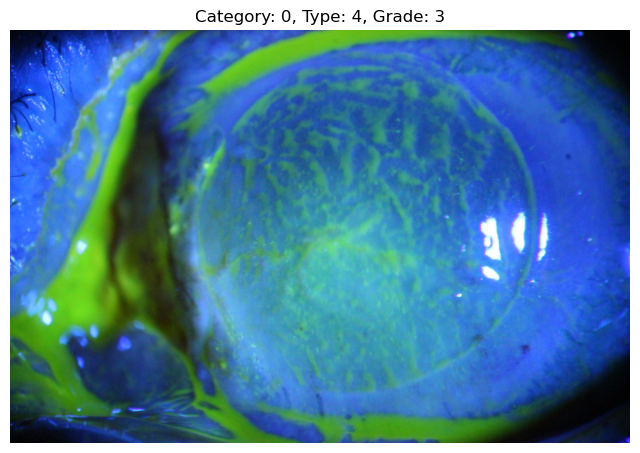

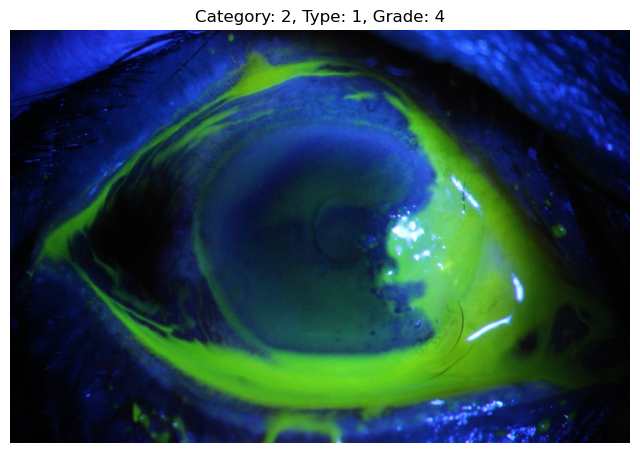

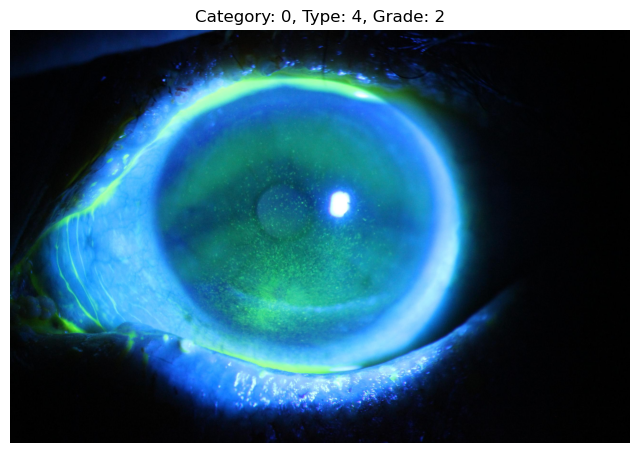

In [4]:
# Directory containing images
image_dir = r"D:\Jupyter Notebook\Projects\EYE Desease\dataset\images"

# Load dataset
csv_file_path = r"D:\Jupyter Notebook\Projects\EYE Desease\dataset\labels.csv"
dataset = pd.read_csv(csv_file_path)

# Select five random images
random_image_indices = random.sample(range(len(dataset)), 5)

# Display the selected images with labels
for idx in random_image_indices:
    image_path = os.path.join(image_dir, dataset.loc[idx, 'name'])
    image = mpimg.imread(image_path)
    plt.figure(figsize=(8, 8))
    plt.imshow(image)
    plt.title(f"Category: {dataset.loc[idx, 'category']}, Type: {dataset.loc[idx, 'type']}, Grade: {dataset.loc[idx, 'grade']}")
    plt.axis('off')
    plt.show()


In [5]:
Type_of_category=df['category'].unique()
Type_of_category

array([0, 1, 2], dtype=int64)

In [6]:
Type_of_diseases=df['type'].unique()
Type_of_diseases

array([4, 2, 1, 0, 3], dtype=int64)

In [7]:
Type_of_grade=df['grade'].unique()
Type_of_grade

array([3, 2, 1, 0, 4], dtype=int64)

In [8]:
dic={}
for i in Type_of_diseases:
    dic[i]=df['type'].value_counts()[i]
    
dic_category={}
for j in Type_of_category:
    dic_category[j]=df['category'].value_counts()[j]
    
dic_grade={}
for k in Type_of_grade:
    dic_grade[k]=df['grade'].value_counts()[k]

print(dic)
print(dic_category)
print(dic_grade)

{4: 548, 2: 40, 1: 78, 0: 36, 3: 10}
{0: 358, 1: 263, 2: 91}
{3: 273, 2: 203, 1: 98, 0: 36, 4: 102}


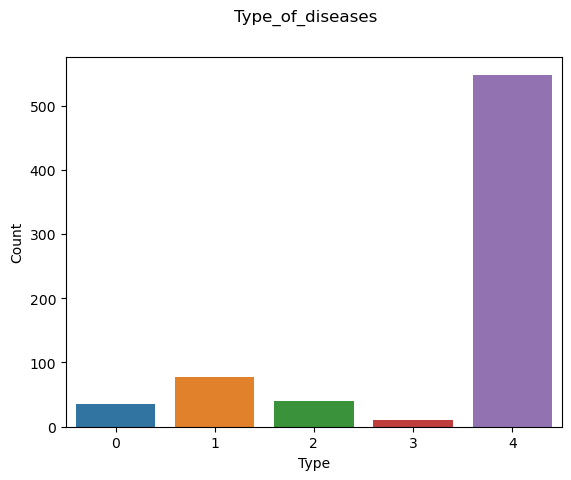

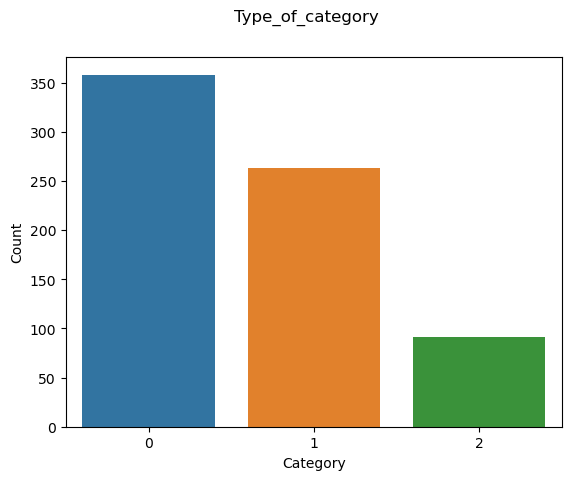

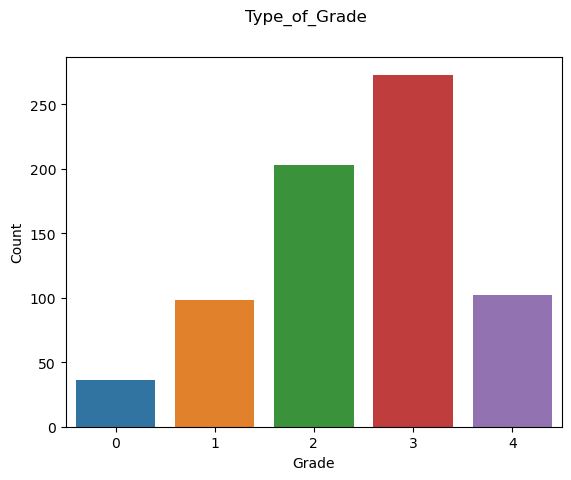

In [9]:
sns.barplot(x = list(dic.keys()), y = list(dic.values()))
plt.suptitle("Type_of_diseases")
plt.xlabel("Type")
plt.ylabel("Count")
plt.show()
sns.barplot(x = list(dic_category.keys()), y = list(dic_category.values()))
plt.suptitle("Type_of_category")
plt.xlabel("Category")
plt.ylabel("Count")
plt.show()
sns.barplot(x = list(dic_grade.keys()), y = list(dic_grade.values()))
plt.suptitle("Type_of_Grade")
plt.xlabel("Grade")
plt.ylabel("Count")
plt.show()

# Data Augmentation

In [12]:
# Load the dataset
dataset = df

# Function to augment images
def augment_image(image_path):
    image = cv2.imread(image_path)
    # Apply augmentation techniques here
    # For example, you can add rotation, flipping, scaling, etc.
    augmented_images = [image]  # Initial image
    # Example: Rotate the image
    rotated_image = cv2.rotate(image, cv2.ROTATE_90_CLOCKWISE)
    augmented_images.append(rotated_image)
    return augmented_images

# Define paths
input_folder = image_dir  # Folder containing original images
output_folder = "augmented_images"  # Folder to store augmented images

# Create output folder if not exists
if not os.path.exists(output_folder):
    os.makedirs(output_folder)

# Augment images and append to the dataset
augmented_dataset = []
for index, row in dataset.iterrows():
    image_name = row['name']
    image_path = os.path.join(input_folder, image_name)
    augmented_images = augment_image(image_path)
    for augmented_image in augmented_images:
        augmented_image_name = f"{os.path.splitext(image_name)[0]}_augmented.jpg"
        augmented_image_path = os.path.join(output_folder, augmented_image_name)
        cv2.imwrite(augmented_image_path, augmented_image)
        augmented_row = {
            'name': augmented_image_name,
            'category': row['category'],
            'type': row['type'],
            'grade': row['grade']
        }
        augmented_dataset.append(augmented_row)

# Convert augmented dataset to DataFrame
augmented_dataset_df = pd.DataFrame(augmented_dataset)

# Append augmented dataset to original dataset
combined_dataset = pd.concat([dataset, augmented_dataset_df], ignore_index=True)

# Save combined dataset to CSV
combined_dataset.to_csv("combined_dataset.csv", index=False)


In [13]:
# Source and destination paths
source_images_folder = image_dir
destination_images_folder = r"D:\Jupyter Notebook\Projects\EYE Desease\augmented_images"

# Copy images
if os.path.exists(source_images_folder) and os.path.isdir(source_images_folder):
    if not os.path.exists(destination_images_folder):
        os.makedirs(destination_images_folder)
    # Copy contents of source_images_folder to destination_images_folder
    for file_name in os.listdir(source_images_folder):
        source_file = os.path.join(source_images_folder, file_name)
        destination_file = os.path.join(destination_images_folder, file_name)
        shutil.copyfile(source_file, destination_file)
else:
    print("Source images folder not found.")


In [14]:
df=combined_dataset
df

name  category  type  grade
0                 1.jpg         0     4      3
1                 2.jpg         0     4      3
2                 3.jpg         0     2      2
3                 4.jpg         0     2      1
4                 5.jpg         0     1      3
...                 ...       ...   ...    ...
2131  710_augmented.jpg         2     1      4
2132  711_augmented.jpg         2     3      4
2133  711_augmented.jpg         2     3      4
2134  712_augmented.jpg         2     4      4
2135  712_augmented.jpg         2     4      4

[2136 rows x 4 columns]

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2136 entries, 0 to 2135
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   name      2136 non-null   object
 1   category  2136 non-null   int64 
 2   type      2136 non-null   int64 
 3   grade     2136 non-null   int64 
dtypes: int64(3), object(1)
memory usage: 66.9+ KB


In [17]:
train_image=r"D:\Jupyter Notebook\Projects\EYE Desease\augmented_images"
train_image

'D:\\Jupyter Notebook\\Projects\\EYE Desease\\augmented_images'

In [18]:
df.nunique()

name        1424
category       3
type           5
grade          5
dtype: int64

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2136 entries, 0 to 2135
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   name      2136 non-null   object
 1   category  2136 non-null   int64 
 2   type      2136 non-null   int64 
 3   grade     2136 non-null   int64 
dtypes: int64(3), object(1)
memory usage: 66.9+ KB


In [20]:
Type_of_category=df['category'].unique()
Type_of_category

array([0, 1, 2], dtype=int64)

In [21]:
Type_of_diseases=df['type'].unique()
Type_of_diseases

array([4, 2, 1, 0, 3], dtype=int64)

In [22]:
Type_of_grade=df['grade'].unique()
Type_of_grade

array([3, 2, 1, 0, 4], dtype=int64)

In [23]:
dic={}
for i in Type_of_diseases:
    dic[i]=df['type'].value_counts()[i]
    
dic_category={}
for j in Type_of_category:
    dic_category[j]=df['category'].value_counts()[j]
    
dic_grade={}
for k in Type_of_grade:
    dic_grade[k]=df['grade'].value_counts()[k]

print(dic)
print(dic_category)
print(dic_grade)

{4: 1644, 2: 120, 1: 234, 0: 108, 3: 30}
{0: 1074, 1: 789, 2: 273}
{3: 819, 2: 609, 1: 294, 0: 108, 4: 306}


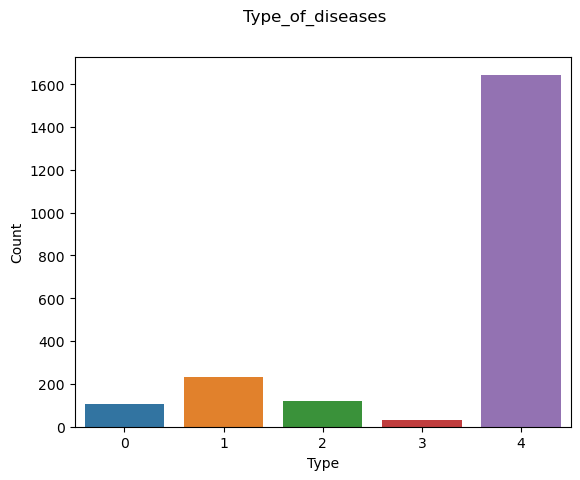

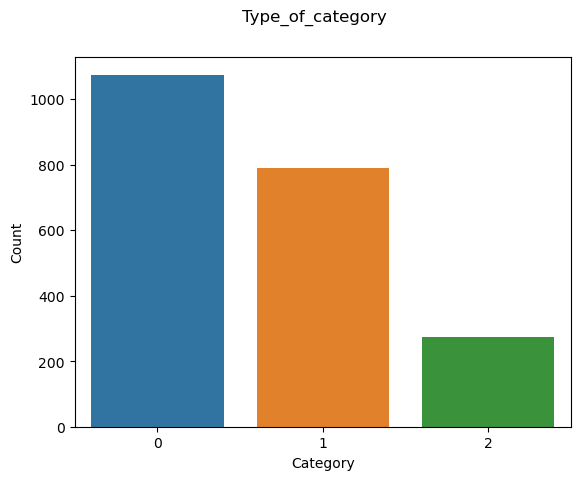

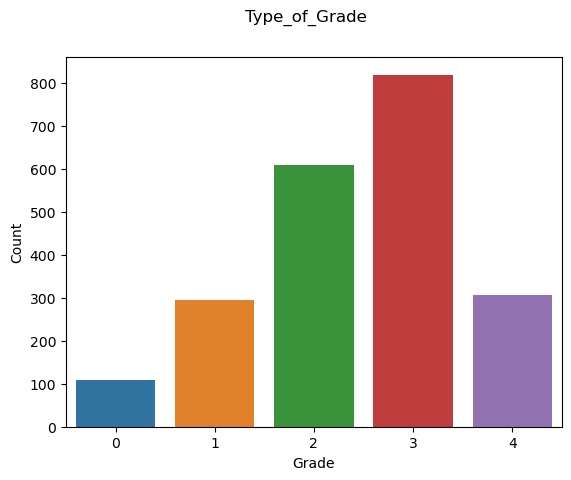

In [24]:
sns.barplot(x = list(dic.keys()), y = list(dic.values()))
plt.suptitle("Type_of_diseases")
plt.xlabel("Type")
plt.ylabel("Count")
plt.show()
sns.barplot(x = list(dic_category.keys()), y = list(dic_category.values()))
plt.suptitle("Type_of_category")
plt.xlabel("Category")
plt.ylabel("Count")
plt.show()
sns.barplot(x = list(dic_grade.keys()), y = list(dic_grade.values()))
plt.suptitle("Type_of_Grade")
plt.xlabel("Grade")
plt.ylabel("Count")
plt.show()

# Model Building

# Category

In [31]:
from tensorflow.keras.preprocessing import image

train_images = []

for i in tqdm(range(df.shape[0])):
    img = image.load_img("D:/Jupyter Notebook/Projects/EYE Desease/augmented_images/"+df['name'][i], target_size=(224, 224))
    img = image.img_to_array(img)
    img = img/255
#     train_images.append(img)
    train_images.append(img)

X = np.array(train_images)
X[0:10]

100%|██████████████████████████████████████████████████████████████████████████████| 2136/2136 [01:34<00:00, 22.52it/s]


array([[[[0.00784314, 0.01568628, 0.0627451 ],
         [0.00784314, 0.01568628, 0.0627451 ],
         [0.01176471, 0.01960784, 0.06666667],
         ...,
         [0.00784314, 0.02352941, 0.05882353],
         [0.00392157, 0.01960784, 0.0627451 ],
         [0.00392157, 0.01960784, 0.0627451 ]],

        [[0.00784314, 0.01568628, 0.0627451 ],
         [0.01176471, 0.01960784, 0.06666667],
         [0.01176471, 0.01960784, 0.06666667],
         ...,
         [0.01960784, 0.02745098, 0.11764706],
         [0.00784314, 0.02352941, 0.07058824],
         [0.00784314, 0.02352941, 0.06666667]],

        [[0.01568628, 0.01568628, 0.0627451 ],
         [0.01960784, 0.02745098, 0.07843138],
         [0.01960784, 0.02745098, 0.07843138],
         ...,
         [0.01568628, 0.02745098, 0.16470589],
         [0.00392157, 0.02352941, 0.09803922],
         [0.00784314, 0.02352941, 0.06666667]],

        ...,

        [[0.00784314, 0.02745098, 0.05098039],
         [0.01176471, 0.02745098, 0.0627451 ]

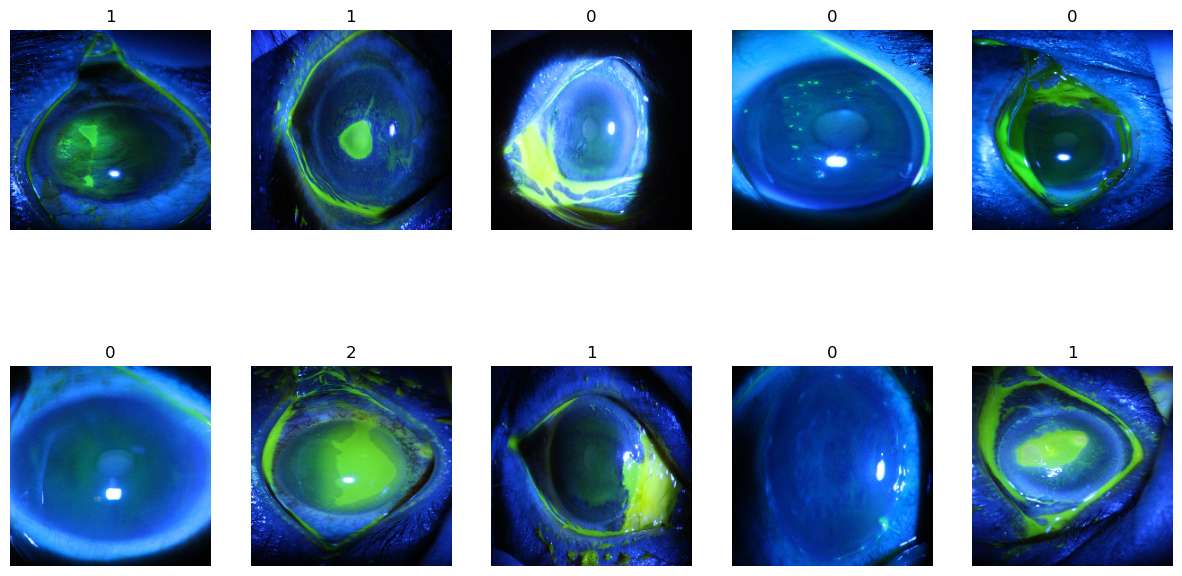

In [32]:
# Select 10 random indices
sample_indices = random.sample(range(len(train_images)), 10)

# Display the images with their corresponding labels
plt.figure(figsize=(15, 8))
for i, idx in enumerate(sample_indices):
    plt.subplot(2, 5, i+1)
    plt.imshow(train_images[idx])
    plt.title(df['category'][idx])  # Accessing label directly from DataFrame
    plt.axis('off')
plt.show()


In [33]:
# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, df['category'].values, test_size=0.3, random_state=42)

In [34]:
# Define the CNN architecture
input_layer = Input(shape=(224, 224, 3))

In [35]:
# Convolutional layers
conv1 = Conv2D(32, (3, 3), activation='relu')(input_layer)
pool1 = MaxPooling2D(pool_size=(2, 2))(conv1)
conv2 = Conv2D(64, (3, 3), activation='relu')(pool1)
pool2 = MaxPooling2D(pool_size=(2, 2))(conv2)


# Flatten layer
flatten = Flatten()(pool2)

# Fully connected layers with L2 regularization
dense1 = Dense(512, activation='relu', kernel_regularizer=l2(0.01))(flatten)
dropout1 = Dropout(0.7)(dense1)
dense2 = Dense(256, activation='relu', kernel_regularizer=l2(0.01))(dropout1)
dropout2 = Dropout(0.5)(dense2)

# Output layer
output_layer = Dense(len(df['category'].unique()), activation='softmax')(dropout2)

In [36]:
# Create the model
model = Model(inputs=input_layer, outputs=output_layer)

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Print model summary
model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 224, 224, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d (Conv2D)                      │ (None, 222, 222, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 111, 111, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 109, 109, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 54, 54, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 186624)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 512)                 │      95,552,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 256)                 │         131,328 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 3)                   │             771 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 95,703,491 (365.08 MB)

 Trainable params: 95,703,491 (365.08 MB)

 Non-trainable params: 0 (0.00 B)

In [37]:
# Train the model
history=model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test),verbose=1)

Epoch 1/10
47/47 ━━━━━━━━━━━━━━━━━━━━ 98s 2s/step - accuracy: 0.4512 - loss: 11.5980 - val_accuracy: 0.6677 - val_loss: 3.6957
Epoch 2/10
47/47 ━━━━━━━━━━━━━━━━━━━━ 96s 2s/step - accuracy: 0.6349 - loss: 3.2384 - val_accuracy: 0.6802 - val_loss: 2.4722
Epoch 3/10
47/47 ━━━━━━━━━━━━━━━━━━━━ 96s 2s/step - accuracy: 0.6622 - loss: 2.4274 - val_accuracy: 0.6880 - val_loss: 2.1827
Epoch 4/10
47/47 ━━━━━━━━━━━━━━━━━━━━ 96s 2s/step - accuracy: 0.6760 - loss: 2.1562 - val_accuracy: 0.7083 - val_loss: 2.0114
Epoch 5/10
47/47 ━━━━━━━━━━━━━━━━━━━━ 94s 2s/step - accuracy: 0.6840 - loss: 1.9719 - val_accuracy: 0.6412 - val_loss: 1.8368
Epoch 6/10
47/47 ━━━━━━━━━━━━━━━━━━━━ 97s 2s/step - accuracy: 0.6598 - loss: 1.7673 - val_accuracy: 0.6771 - val_loss: 1.6968
Epoch 7/10
47/47 ━━━━━━━━━━━━━━━━━━━━ 98s 2s/step - accuracy: 0.7165 - loss: 1.5912 - val_accuracy: 0.6755 - val_loss: 1.5977
Epoch 8/10
47/47 ━━━━━━━━━━━━━━━━━━━━ 96s 2s/step - accuracy: 0.7162 - loss: 1.5196 - val_accuracy: 0.6927 - val_loss

In [38]:
# Evaluate the model
train_loss, train_accuracy = model.evaluate(X_train, y_train, verbose=0)
print("Training Accuracy:", train_accuracy)
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=0)
print("Test Accuracy:", test_accuracy)

Training Accuracy: 0.7491638660430908
Test Accuracy: 0.7269890904426575


In [39]:
train_accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

train_loss = history.history['loss']
val_loss = history.history['val_loss']


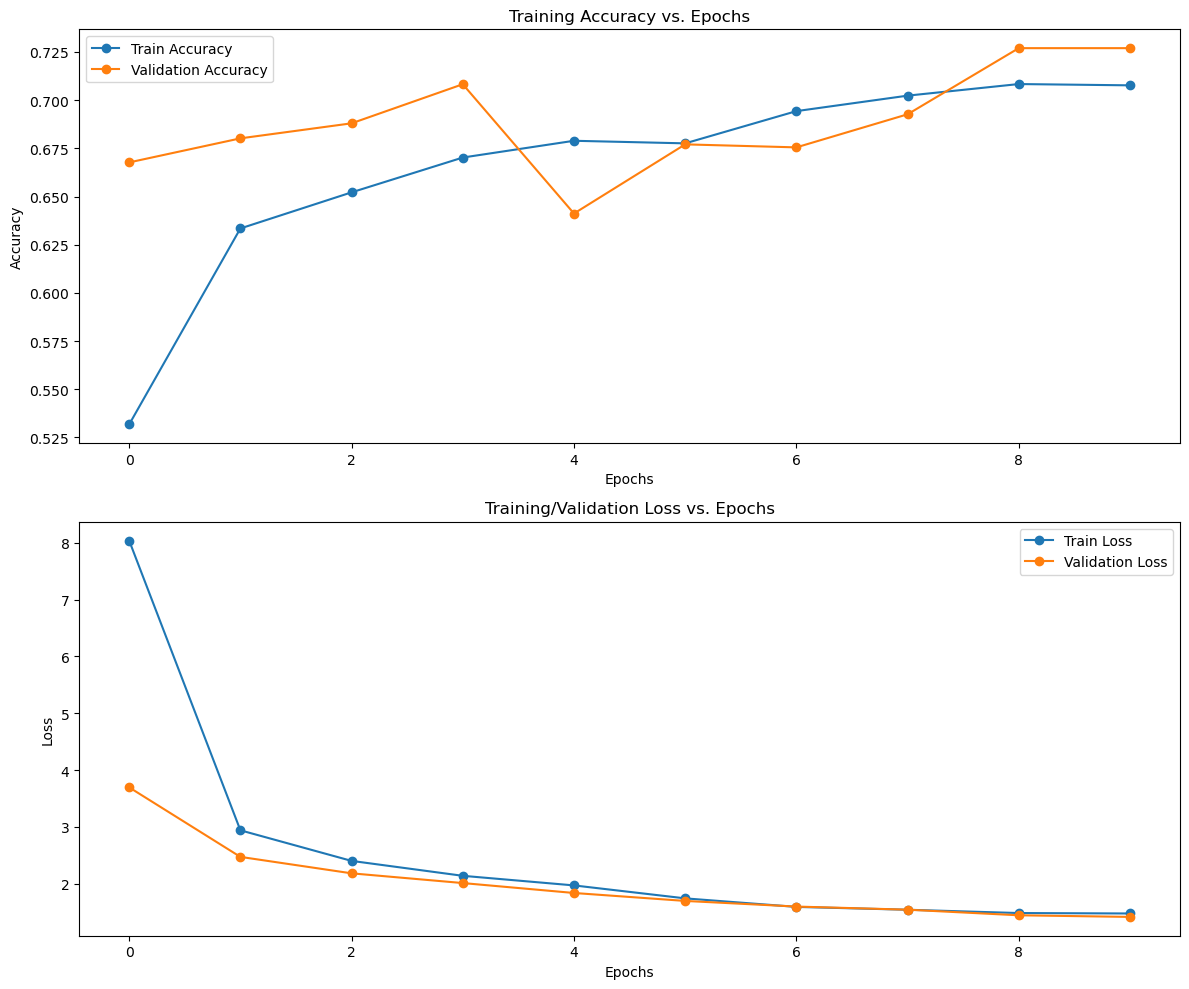

In [40]:
fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(12, 10))

ax[0].set_title('Training Accuracy vs. Epochs')
ax[0].plot(train_accuracy, 'o-', label='Train Accuracy')
ax[0].plot(val_accuracy, 'o-', label='Validation Accuracy')
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('Accuracy')
ax[0].legend(loc='best')

ax[1].set_title('Training/Validation Loss vs. Epochs')
ax[1].plot(train_loss, 'o-', label='Train Loss')
ax[1].plot(val_loss, 'o-', label='Validation Loss')
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('Loss')
ax[1].legend(loc='best')


plt.tight_layout()
plt.show()


In [41]:
y_test

array([1, 0, 1, 0, 1, 0, 0, 2, 0, 1, 2, 1, 2, 1, 0, 0, 1, 0, 1, 0, 0, 1,
       1, 2, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 2, 0, 1, 2, 0, 2, 1, 0, 0, 1,
       0, 0, 0, 2, 1, 1, 0, 1, 0, 1, 1, 1, 1, 2, 2, 1, 1, 0, 1, 1, 1, 1,
       0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 2, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 2, 1, 0,
       1, 1, 1, 2, 2, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 2, 0, 2, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 1, 1, 1, 2, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 2, 2,
       1, 1, 1, 2, 0, 2, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 2, 1, 1, 2, 1, 0, 2, 1, 0, 1, 1, 0, 0, 1, 2, 1, 1, 1, 1,
       1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 2, 0, 0, 1, 0, 1, 1, 2,
       0, 1, 0, 0, 1, 1, 2, 0, 2, 0, 2, 1, 1, 0, 2, 0, 0, 1, 0, 1, 2, 2,
       0, 2, 2, 0, 1, 0, 0, 1, 1, 2, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 2,
       1, 1, 1, 0, 2, 0, 1, 1, 0, 0, 0, 0, 0, 1, 2,

In [42]:
y_pred=model.predict(X_test) 
y_pred

21/21 ━━━━━━━━━━━━━━━━━━━━ 3s 140ms/step


array([[0.15553892, 0.596596  , 0.24786511],
       [0.6423548 , 0.25355038, 0.10409486],
       [0.09656328, 0.5172882 , 0.38614854],
       ...,
       [0.8712932 , 0.09896916, 0.02973767],
       [0.9091779 , 0.07446746, 0.01635474],
       [0.9061112 , 0.07463043, 0.01925834]], dtype=float32)

In [43]:
y_pred_classes = np.argmax(y_pred, axis=1)
y_pred_classes

array([1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1,
       1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 2, 0, 1, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 2, 2, 1, 1, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0,
       0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 2, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1,
       0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 2, 0, 0, 2, 0, 1, 1, 2,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1,

In [44]:
y_pred_train=model.predict(X_train) 
y_pred_train

47/47 ━━━━━━━━━━━━━━━━━━━━ 7s 140ms/step


array([[9.2888242e-01, 5.6544229e-02, 1.4573387e-02],
       [6.1568612e-01, 2.7692488e-01, 1.0738889e-01],
       [1.6388009e-04, 3.1594890e-01, 6.8388724e-01],
       ...,
       [9.6632564e-01, 2.7924065e-02, 5.7502887e-03],
       [8.0936825e-01, 1.5464489e-01, 3.5986826e-02],
       [9.4381332e-01, 4.6238508e-02, 9.9481130e-03]], dtype=float32)

In [45]:
y_pred_classes_train = np.argmax(y_pred_train, axis=1)
y_pred_classes_train

array([0, 0, 2, ..., 0, 0, 0], dtype=int64)

In [46]:
class_counts = np.bincount(y_train)

# Print the counts
for class_label, count in enumerate(class_counts):
    print(f"Class {class_label}: {count} instances")

Class 0: 764 instances
Class 1: 532 instances
Class 2: 199 instances


In [47]:
class_counts = np.bincount(y_pred_classes_train)

# Print the counts
for class_label, count in enumerate(class_counts):
    print(f"Class {class_label}: {count} instances")

Class 0: 909 instances
Class 1: 527 instances
Class 2: 59 instances


In [48]:
print(classification_report(y_test,y_pred_classes))

              precision    recall  f1-score   support

           0       0.74      0.92      0.82       310
           1       0.72      0.67      0.69       257
           2       0.59      0.14      0.22        74

    accuracy                           0.73       641
   macro avg       0.68      0.57      0.58       641
weighted avg       0.71      0.73      0.70       641



# Type

In [49]:
X_train1, X_test1, y_train1, y_test1 = train_test_split(X, df['type'].values, test_size=0.3, random_state=42)

In [50]:
# Load MobileNetV2 base model
base_model = MobileNetV2(input_shape=(224, 224, 3), include_top=False, weights='imagenet')

# Freeze layers in the base model (optional, depending on fine-tuning strategy)
for layer in base_model.layers:
    layer.trainable = False

# Add custom head for classification
x = GlobalAveragePooling2D()(base_model.output)
x = Dense(256, activation='relu')(x)
x = Dropout(0.5)(x)
outputs = Dense(5, activation='softmax')(x)  # Assuming 5 output classes

# Create a new model
model1 = Model(inputs=base_model.input, outputs=outputs)

# Compile the model
model1.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Display model summary
model1.summary()


9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step


Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                  ┃ Output Shape              ┃         Param # ┃ Connected to               ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)    │ (None, 224, 224, 3)       │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ Conv1 (Conv2D)                │ (None, 112, 112, 32)      │             864 │ input_layer_1[0][0]        │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ bn_Conv1 (BatchNormalization) │ (None, 112, 112, 32)      │             128 │ Conv1[0][0]                │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ Conv1_relu (ReLU)             │ (None, 112, 112, 32)      │               0 │ bn_Conv1[0][0]             │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ expanded_conv_depthwise       │ (None, 112, 112, 32)      │             288 │ Conv1_relu[0][0]           │
│ (DepthwiseConv2D)             │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ expanded_conv_depthwise_BN    │ (None, 112, 112, 32)      │             128 │ expanded_conv_depthwise[0… │
│ (BatchNormalization)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ expanded_conv_depthwise_relu  │ (None, 112, 112, 32)      │               0 │ expanded_conv_depthwise_B… │
│ (ReLU)                        │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ expanded_conv_project         │ (None, 112, 112, 16)      │             512 │ expanded_conv_depthwise_r… │
│ (Conv2D)                      │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ expanded_conv_project_BN      │ (None, 112, 112, 16)      │              64 │ expanded_conv_project[0][… │
│ (BatchNormalization)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block_1_expand (Conv2D)       │ (None, 112, 112, 96)      │           1,536 │ expanded_conv_project_BN[… │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block_1_expand_BN             │ (None, 112, 112, 96)      │             384 │ block_1_expand[0][0]       │
│ (BatchNormalization)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block_1_expand_relu (ReLU)    │ (None, 112, 112, 96)      │               0 │ block_1_expand_BN[0][0]    │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block_1_pad (ZeroPadding2D)   │ (None, 113, 113, 96)      │               0 │ block_1_expand_relu[0][0]  │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block_1_depthwise             │ (None, 56, 56, 96)        │             864 │ block_1_pad[0][0]          │
│ (DepthwiseConv2D)             │                           │               

 Total params: 2,587,205 (9.87 MB)

 Trainable params: 329,221 (1.26 MB)

 Non-trainable params: 2,257,984 (8.61 MB)

In [51]:
history=model1.fit(X_train1, y_train1, epochs=10, batch_size=64, validation_data=(X_test1, y_test1),verbose=1)

Epoch 1/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 58s 2s/step - accuracy: 0.6357 - loss: 1.3121 - val_accuracy: 0.8003 - val_loss: 0.6664
Epoch 2/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 49s 2s/step - accuracy: 0.7838 - loss: 0.6580 - val_accuracy: 0.7972 - val_loss: 0.6384
Epoch 3/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 51s 2s/step - accuracy: 0.7908 - loss: 0.6247 - val_accuracy: 0.8081 - val_loss: 0.5671
Epoch 4/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 49s 2s/step - accuracy: 0.8117 - loss: 0.5640 - val_accuracy: 0.8112 - val_loss: 0.5520
Epoch 5/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 52s 2s/step - accuracy: 0.8292 - loss: 0.4678 - val_accuracy: 0.8128 - val_loss: 0.5279
Epoch 6/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 47s 2s/step - accuracy: 0.8314 - loss: 0.4774 - val_accuracy: 0.8128 - val_loss: 0.5145
Epoch 7/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 47s 2s/step - accuracy: 0.8444 - loss: 0.4412 - val_accuracy: 0.8284 - val_loss: 0.5066
Epoch 8/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 47s 2s/step - accuracy: 0.8734 - loss: 0.3674 - val_accuracy: 0.8378 - val_loss:

In [52]:
# Evaluate the model
train_loss1, train_accuracy1 = model1.evaluate(X_train1, y_train1, verbose=0)
print("Training Accuracy:", train_accuracy1)
test_loss1, test_accuracy1 = model1.evaluate(X_test1, y_test1, verbose=0)
print("Test Accuracy:", test_accuracy1)

Training Accuracy: 0.9170568585395813
Test Accuracy: 0.8377535343170166


In [53]:
train_accuracy1 = history.history['accuracy']
val_accuracy1 = history.history['val_accuracy']

train_loss1 = history.history['loss']
val_loss1 = history.history['val_loss']

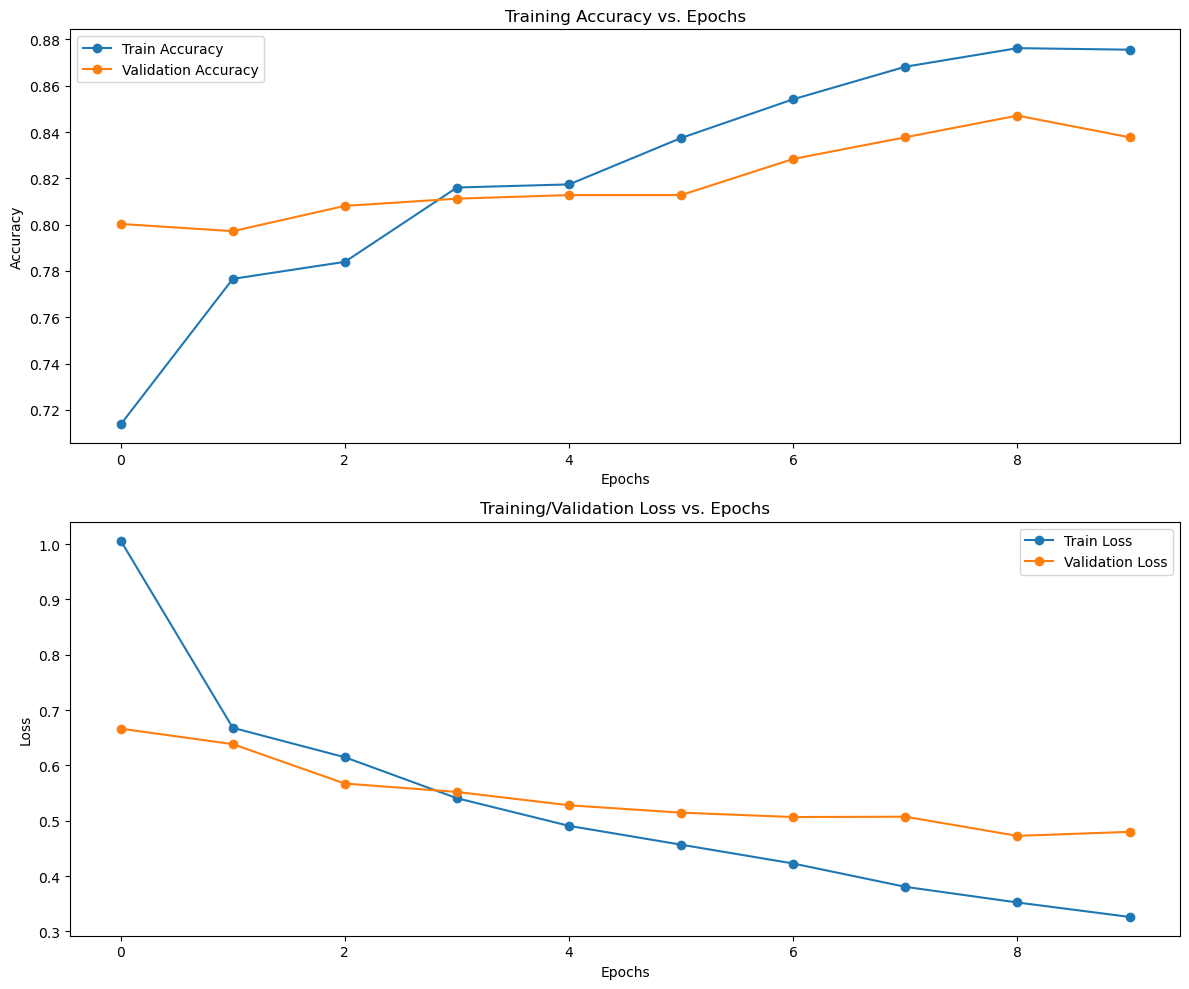

In [54]:
fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(12, 10))

ax[0].set_title('Training Accuracy vs. Epochs')
ax[0].plot(train_accuracy1, 'o-', label='Train Accuracy')
ax[0].plot(val_accuracy1, 'o-', label='Validation Accuracy')
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('Accuracy')
ax[0].legend(loc='best')

ax[1].set_title('Training/Validation Loss vs. Epochs')
ax[1].plot(train_loss1, 'o-', label='Train Loss')
ax[1].plot(val_loss1, 'o-', label='Validation Loss')
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('Loss')
ax[1].legend(loc='best')


plt.tight_layout()
plt.show()

In [55]:
y_test1

array([4, 4, 4, 4, 4, 4, 4, 1, 4, 4, 4, 4, 1, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 2, 4, 2, 4, 4, 4, 4, 4, 4, 4, 4, 4, 1, 1, 4, 4, 4, 4, 4, 4, 4,
       4, 1, 4, 4, 4, 4, 4, 4, 2, 4, 4, 1, 4, 4, 4, 4, 4, 1, 4, 4, 4, 4,
       4, 4, 4, 4, 0, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 0, 4, 4, 4, 2, 4, 3,
       4, 4, 4, 4, 4, 1, 4, 4, 4, 4, 4, 4, 4, 2, 2, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 2, 4, 4, 4, 2, 4, 4, 4, 4, 1, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 0, 4, 4, 4, 4, 0, 4, 4, 4, 4, 4, 4, 4,
       1, 4, 4, 2, 4, 4, 4, 4, 4, 4, 2, 4, 4, 4, 4, 4, 1, 4, 4, 4, 1, 4,
       4, 4, 4, 4, 2, 1, 4, 4, 4, 4, 2, 4, 4, 4, 0, 4, 3, 4, 4, 1, 4, 4,
       3, 1, 4, 4, 4, 4, 4, 4, 4, 2, 1, 4, 4, 1, 4, 4, 4, 1, 4, 4, 4, 4,
       4, 4, 4, 0, 4, 2, 0, 0, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 3, 2, 4, 4, 4, 1, 0, 4, 4, 4, 4, 4, 4, 1, 2, 4, 4, 4, 4, 1, 4,
       4, 4, 4, 2, 4, 1, 4, 4, 4, 4, 4, 2, 4, 4, 4, 1, 4, 3, 4, 2, 4, 3,
       4, 2, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 1,

In [56]:
y_pred1=model1.predict(X_test1) 
y_pred1

21/21 ━━━━━━━━━━━━━━━━━━━━ 16s 701ms/step


array([[3.7851857e-04, 1.5912428e-02, 2.3809546e-03, 7.7570358e-04,
        9.8055238e-01],
       [1.0358777e-03, 2.6867511e-02, 1.4330378e-03, 2.3278706e-03,
        9.6833569e-01],
       [1.3691036e-04, 4.8415433e-03, 2.6772155e-03, 8.6152233e-04,
        9.9148285e-01],
       ...,
       [3.1792004e-02, 1.8418872e-01, 2.2960673e-01, 1.0999242e-02,
        5.4341334e-01],
       [9.0842928e-05, 1.3614279e-02, 9.5799612e-04, 1.4855851e-03,
        9.8385125e-01],
       [8.2248368e-04, 5.8548700e-04, 1.5134964e-03, 2.7311167e-03,
        9.9434739e-01]], dtype=float32)

In [57]:
y_pred_classes1 = np.argmax(y_pred1, axis=1)
y_pred_classes1

array([4, 4, 4, 4, 4, 4, 4, 1, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 2, 4, 4, 4, 4, 4, 1, 4, 4, 4, 4, 4, 1, 4, 4, 4, 4, 4, 4, 0, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 1, 4, 4, 4, 4, 4, 0, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 1,
       4, 4, 4, 4, 4, 1, 4, 4, 4, 4, 4, 4, 4, 4, 1, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 1, 4, 1, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 0, 4, 1, 4, 4, 4, 4, 4,
       1, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 1, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 1, 4, 0, 4, 1, 4, 2, 4, 4, 4, 0, 4, 4, 4, 4, 1, 4, 4,
       4, 4, 4, 4, 4, 4, 0, 4, 4, 4, 1, 4, 4, 1, 4, 4, 4, 1, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 1, 4, 0, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 1, 4, 4, 4, 4, 4, 4, 4, 1, 1, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 2, 4, 4, 4, 4, 4, 4, 4, 2, 4, 4, 4, 1, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 1,

In [58]:
print(classification_report(y_test1,y_pred_classes1))

              precision    recall  f1-score   support

           0       0.53      0.24      0.33        33
           1       0.68      0.52      0.59        61
           2       1.00      0.14      0.24        36
           3       0.00      0.00      0.00         9
           4       0.86      0.98      0.91       502

    accuracy                           0.84       641
   macro avg       0.61      0.38      0.42       641
weighted avg       0.82      0.84      0.80       641



In [59]:
y_pred1_train=model1.predict(X_train1) 
y_pred1

47/47 ━━━━━━━━━━━━━━━━━━━━ 35s 739ms/step


array([[3.7851857e-04, 1.5912428e-02, 2.3809546e-03, 7.7570358e-04,
        9.8055238e-01],
       [1.0358777e-03, 2.6867511e-02, 1.4330378e-03, 2.3278706e-03,
        9.6833569e-01],
       [1.3691036e-04, 4.8415433e-03, 2.6772155e-03, 8.6152233e-04,
        9.9148285e-01],
       ...,
       [3.1792004e-02, 1.8418872e-01, 2.2960673e-01, 1.0999242e-02,
        5.4341334e-01],
       [9.0842928e-05, 1.3614279e-02, 9.5799612e-04, 1.4855851e-03,
        9.8385125e-01],
       [8.2248368e-04, 5.8548700e-04, 1.5134964e-03, 2.7311167e-03,
        9.9434739e-01]], dtype=float32)

In [60]:
y_pred_classes1_train = np.argmax(y_pred1_train, axis=1)
y_pred_classes1_train

array([4, 4, 4, ..., 2, 4, 4], dtype=int64)

In [61]:
class_counts = np.bincount(y_pred_classes1_train)

# Print the counts
for class_label, count in enumerate(class_counts):
    print(f"Class {class_label}: {count} instances")

Class 0: 64 instances
Class 1: 162 instances
Class 2: 35 instances
Class 3: 13 instances
Class 4: 1221 instances


In [62]:
y_train1

array([4, 4, 4, ..., 2, 4, 0], dtype=int64)

In [63]:
class_counts = np.bincount(y_train1)

# Print the counts
for class_label, count in enumerate(class_counts):
    print(f"Class {class_label}: {count} instances")

Class 0: 75 instances
Class 1: 173 instances
Class 2: 84 instances
Class 3: 21 instances
Class 4: 1142 instances


# Grade 

In [64]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(X, df['grade'].values, test_size=0.3, random_state=42)

In [65]:
# Load MobileNetV2 base model
base_model = MobileNetV2(input_shape=(224, 224, 3), include_top=False, weights='imagenet')

# Freeze layers in the base model (optional, depending on fine-tuning strategy)
for layer in base_model.layers:
    layer.trainable = False

# Add custom head for classification
x = GlobalAveragePooling2D()(base_model.output)
x = Dense(256, activation='relu')(x)
x = Dropout(0.5)(x)
outputs = Dense(5, activation='softmax')(x)  # Assuming 5 output classes

# Create a new model
model = Model(inputs=base_model.input, outputs=outputs)

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Display model summary
model.summary()


Model: "functional_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                  ┃ Output Shape              ┃         Param # ┃ Connected to               ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_2 (InputLayer)    │ (None, 224, 224, 3)       │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ Conv1 (Conv2D)                │ (None, 112, 112, 32)      │             864 │ input_layer_2[0][0]        │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ bn_Conv1 (BatchNormalization) │ (None, 112, 112, 32)      │             128 │ Conv1[0][0]                │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ Conv1_relu (ReLU)             │ (None, 112, 112, 32)      │               0 │ bn_Conv1[0][0]             │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ expanded_conv_depthwise       │ (None, 112, 112, 32)      │             288 │ Conv1_relu[0][0]           │
│ (DepthwiseConv2D)             │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ expanded_conv_depthwise_BN    │ (None, 112, 112, 32)      │             128 │ expanded_conv_depthwise[0… │
│ (BatchNormalization)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ expanded_conv_depthwise_relu  │ (None, 112, 112, 32)      │               0 │ expanded_conv_depthwise_B… │
│ (ReLU)                        │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ expanded_conv_project         │ (None, 112, 112, 16)      │             512 │ expanded_conv_depthwise_r… │
│ (Conv2D)                      │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ expanded_conv_project_BN      │ (None, 112, 112, 16)      │              64 │ expanded_conv_project[0][… │
│ (BatchNormalization)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block_1_expand (Conv2D)       │ (None, 112, 112, 96)      │           1,536 │ expanded_conv_project_BN[… │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block_1_expand_BN             │ (None, 112, 112, 96)      │             384 │ block_1_expand[0][0]       │
│ (BatchNormalization)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block_1_expand_relu (ReLU)    │ (None, 112, 112, 96)      │               0 │ block_1_expand_BN[0][0]    │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block_1_pad (ZeroPadding2D)   │ (None, 113, 113, 96)      │               0 │ block_1_expand_relu[0][0]  │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block_1_depthwise             │ (None, 56, 56, 96)        │             864 │ block_1_pad[0][0]          │
│ (DepthwiseConv2D)             │                           │               

 Total params: 2,587,205 (9.87 MB)

 Trainable params: 329,221 (1.26 MB)

 Non-trainable params: 2,257,984 (8.61 MB)

In [66]:
# Train the model
history = model.fit(X_train2, y_train2, epochs=25, batch_size=32, validation_split=0.2,verbose=1)


Epoch 1/25
38/38 ━━━━━━━━━━━━━━━━━━━━ 39s 911ms/step - accuracy: 0.3428 - loss: 1.7501 - val_accuracy: 0.4515 - val_loss: 1.2494
Epoch 2/25
38/38 ━━━━━━━━━━━━━━━━━━━━ 34s 886ms/step - accuracy: 0.4832 - loss: 1.2277 - val_accuracy: 0.4716 - val_loss: 1.1988
Epoch 3/25
38/38 ━━━━━━━━━━━━━━━━━━━━ 34s 892ms/step - accuracy: 0.5137 - loss: 1.1555 - val_accuracy: 0.4950 - val_loss: 1.1894
Epoch 4/25
38/38 ━━━━━━━━━━━━━━━━━━━━ 34s 898ms/step - accuracy: 0.5344 - loss: 1.0854 - val_accuracy: 0.5117 - val_loss: 1.1482
Epoch 5/25
38/38 ━━━━━━━━━━━━━━━━━━━━ 35s 915ms/step - accuracy: 0.6000 - loss: 0.9891 - val_accuracy: 0.4983 - val_loss: 1.1552
Epoch 6/25
38/38 ━━━━━━━━━━━━━━━━━━━━ 35s 937ms/step - accuracy: 0.5938 - loss: 0.9879 - val_accuracy: 0.5151 - val_loss: 1.1265
Epoch 7/25
38/38 ━━━━━━━━━━━━━━━━━━━━ 36s 938ms/step - accuracy: 0.6377 - loss: 0.9024 - val_accuracy: 0.5485 - val_loss: 1.0943
Epoch 8/25
38/38 ━━━━━━━━━━━━━━━━━━━━ 35s 919ms/step - accuracy: 0.6564 - loss: 0.8700 - val_accu

In [67]:
# Evaluate the model
train_loss2, train_accuracy2 = model.evaluate(X_train2, y_train2, verbose=0)
print("Training Accuracy:", train_accuracy2)
test_loss2, test_accuracy2 = model.evaluate(X_test2, y_test2, verbose=0)
print("Test Accuracy:", test_accuracy2)

Training Accuracy: 0.9250836372375488
Test Accuracy: 0.6489859819412231


In [68]:
train_accuracy2 = history.history['accuracy']
val_accuracy2 = history.history['val_accuracy']

train_loss2 = history.history['loss']
val_loss2 = history.history['val_loss']

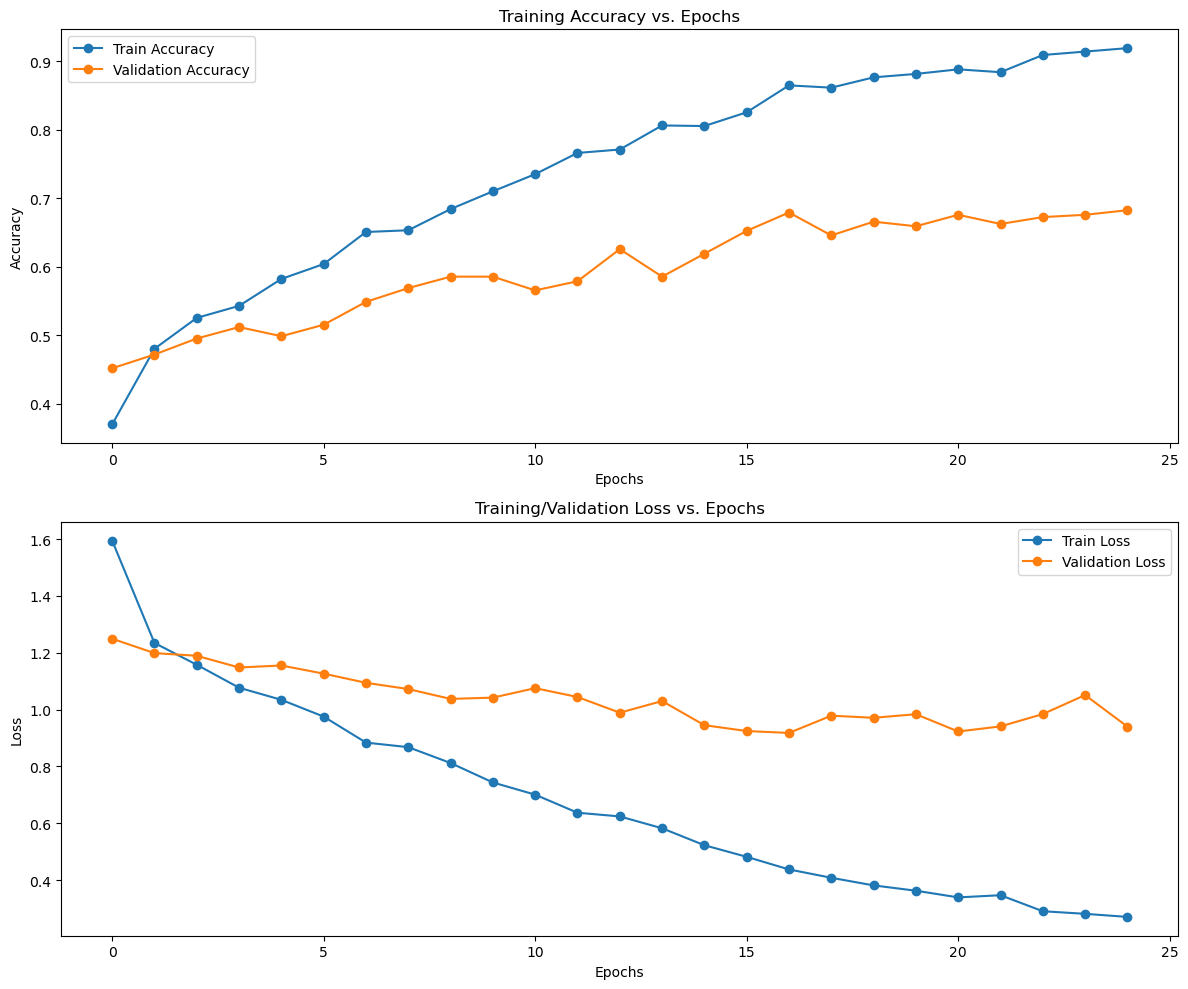

In [69]:
fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(12, 10))

ax[0].set_title('Training Accuracy vs. Epochs')
ax[0].plot(train_accuracy2, 'o-', label='Train Accuracy')
ax[0].plot(val_accuracy2, 'o-', label='Validation Accuracy')
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('Accuracy')
ax[0].legend(loc='best')

ax[1].set_title('Training/Validation Loss vs. Epochs')
ax[1].plot(train_loss2, 'o-', label='Train Loss')
ax[1].plot(val_loss2, 'o-', label='Validation Loss')
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('Loss')
ax[1].legend(loc='best')


plt.tight_layout()
plt.show()

In [70]:
y_test2

array([3, 2, 2, 3, 2, 2, 2, 4, 3, 2, 4, 1, 4, 2, 2, 3, 2, 3, 3, 3, 2, 3,
       3, 4, 3, 3, 3, 2, 3, 1, 3, 3, 2, 3, 4, 1, 3, 4, 3, 4, 3, 3, 2, 3,
       2, 3, 3, 4, 3, 1, 3, 2, 2, 3, 2, 2, 2, 4, 4, 3, 1, 1, 3, 2, 3, 4,
       3, 2, 3, 2, 0, 3, 2, 3, 2, 2, 2, 4, 3, 1, 2, 0, 2, 3, 3, 2, 4, 2,
       1, 3, 3, 2, 2, 3, 2, 3, 1, 1, 3, 3, 4, 3, 2, 3, 3, 3, 2, 3, 1, 3,
       2, 3, 3, 3, 4, 1, 2, 3, 3, 3, 2, 1, 2, 4, 3, 3, 3, 3, 2, 4, 2, 3,
       3, 2, 2, 4, 4, 3, 2, 3, 3, 0, 3, 2, 2, 2, 0, 3, 4, 1, 4, 3, 3, 2,
       1, 2, 3, 3, 3, 2, 3, 3, 3, 4, 3, 3, 2, 3, 1, 1, 1, 2, 1, 2, 4, 4,
       3, 3, 3, 4, 3, 4, 2, 2, 1, 1, 3, 3, 2, 3, 0, 2, 3, 3, 2, 1, 2, 3,
       2, 1, 3, 4, 3, 2, 4, 2, 2, 4, 2, 2, 3, 3, 3, 3, 2, 4, 4, 3, 3, 3,
       3, 4, 3, 0, 1, 2, 0, 0, 2, 2, 3, 2, 3, 1, 4, 3, 2, 4, 3, 3, 3, 4,
       3, 3, 2, 3, 1, 2, 4, 0, 4, 2, 4, 2, 3, 3, 4, 2, 3, 3, 3, 3, 4, 4,
       2, 4, 4, 1, 2, 2, 2, 2, 2, 4, 2, 2, 3, 2, 1, 2, 3, 2, 3, 2, 3, 4,
       2, 1, 3, 3, 4, 3, 4, 2, 1, 3, 1, 3, 3, 3, 4,

In [71]:
y_pred2=model.predict(X_test2) 
y_pred2

21/21 ━━━━━━━━━━━━━━━━━━━━ 16s 728ms/step


array([[7.2885107e-04, 3.8721360e-02, 8.0988246e-01, 1.3157190e-01,
        1.9095445e-02],
       [4.9015216e-04, 6.5300018e-03, 8.2750040e-01, 1.6519837e-01,
        2.8109277e-04],
       [5.9053983e-04, 1.3797991e-02, 6.2041748e-01, 3.4604961e-01,
        1.9144313e-02],
       ...,
       [9.4919698e-03, 4.4300431e-01, 3.9666584e-01, 1.4287861e-01,
        7.9593370e-03],
       [3.8456201e-04, 1.7178336e-02, 2.2063553e-01, 7.5674045e-01,
        5.0611030e-03],
       [3.0328435e-04, 1.0323497e-03, 9.3421137e-01, 6.4287625e-02,
        1.6529211e-04]], dtype=float32)

In [72]:
y_pred_classes2 = np.argmax(y_pred2, axis=1)
y_pred_classes2

array([2, 2, 2, 3, 2, 2, 2, 4, 2, 2, 2, 1, 1, 2, 2, 3, 2, 3, 3, 3, 2, 2,
       4, 4, 3, 3, 3, 2, 3, 4, 3, 2, 2, 3, 4, 1, 3, 2, 3, 4, 3, 3, 2, 2,
       2, 3, 3, 3, 1, 1, 3, 3, 2, 3, 4, 2, 2, 2, 4, 3, 1, 2, 2, 2, 3, 3,
       3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 3, 2, 3, 2, 2, 3, 4, 2, 2, 2,
       1, 3, 3, 2, 2, 3, 2, 3, 1, 4, 3, 3, 3, 3, 3, 3, 3, 2, 2, 3, 3, 3,
       2, 2, 3, 3, 2, 1, 2, 2, 3, 2, 3, 1, 1, 3, 3, 3, 4, 3, 3, 4, 2, 2,
       3, 2, 2, 4, 1, 2, 2, 3, 3, 2, 3, 2, 2, 2, 0, 3, 4, 3, 4, 3, 3, 2,
       1, 2, 3, 3, 3, 2, 3, 3, 2, 4, 3, 3, 3, 4, 1, 2, 1, 2, 2, 2, 2, 2,
       3, 2, 3, 2, 3, 4, 2, 2, 4, 3, 3, 2, 2, 3, 0, 2, 3, 3, 2, 1, 1, 3,
       2, 2, 3, 4, 2, 2, 2, 4, 2, 4, 4, 2, 3, 4, 3, 3, 2, 4, 2, 3, 2, 3,
       2, 4, 3, 2, 3, 2, 2, 0, 2, 2, 3, 2, 3, 2, 4, 3, 2, 4, 3, 4, 4, 4,
       3, 2, 2, 3, 1, 3, 4, 2, 4, 2, 3, 2, 2, 3, 4, 3, 3, 2, 2, 3, 2, 4,
       2, 1, 4, 1, 2, 3, 2, 3, 2, 2, 3, 2, 3, 2, 1, 1, 3, 2, 1, 3, 3, 2,
       2, 4, 2, 3, 4, 2, 2, 2, 1, 3, 2, 3, 2, 2, 4,

In [73]:
print(classification_report(y_test2,y_pred_classes2))

              precision    recall  f1-score   support

           0       0.85      0.33      0.48        33
           1       0.65      0.51      0.57        89
           2       0.55      0.75      0.63       184
           3       0.74      0.71      0.72       245
           4       0.66      0.54      0.60        90

    accuracy                           0.65       641
   macro avg       0.69      0.57      0.60       641
weighted avg       0.67      0.65      0.65       641

